In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
# Carga de datos 
#df = pd.read_csv('../data/period_sem_table.csv')
dfBeta = pd.read_csv('../data/period_sem_table_modified.csv')
df = dfBeta.round()

In [25]:
df

,periodo_1,periodo_2,periodo_3,periodo_4,periodo_5,periodo_6,periodo_7,periodo_8,periodo_9,periodo_10,...,periodo_13,periodo_14,periodo_15,periodo_16,periodo_17,periodo_18,periodo_19,periodo_20,periodo_21,periodo_22
0,3.0,2.0,3.0,1.0,4.0,2.0,2.0,1.0,2.0,2.0,...,3.0,4.0,3.0,4.0,3.0,3.0,3.0,6.0,3.0,3.0
1,15.0,24.0,19.0,19.0,19.0,32.0,14.0,26.0,22.0,25.0,...,20.0,22.0,21.0,22.0,24.0,30.0,23.0,26.0,21.0,23.0
2,18.0,19.0,22.0,18.0,18.0,18.0,24.0,14.0,13.0,15.0,...,21.0,18.0,19.0,18.0,20.0,19.0,24.0,23.0,24.0,20.0
3,12.0,13.0,17.0,18.0,18.0,18.0,17.0,23.0,22.0,13.0,...,16.0,18.0,18.0,18.0,19.0,20.0,18.0,24.0,18.0,18.0
4,18.0,14.0,12.0,12.0,12.0,17.0,18.0,16.0,18.0,12.0,...,18.0,12.0,17.0,12.0,18.0,18.0,18.0,18.0,17.0,14.0
5,14.0,12.0,12.0,12.0,12.0,12.0,14.0,18.0,14.0,14.0,...,12.0,12.0,12.0,12.0,12.0,18.0,12.0,18.0,22.0,18.0
6,14.0,14.0,12.0,13.0,14.0,12.0,12.0,12.0,19.0,12.0,...,16.0,10.0,18.0,13.0,18.0,12.0,18.0,18.0,18.0,17.0
7,13.0,13.0,10.0,15.0,15.0,12.0,11.0,12.0,13.0,12.0,...,15.0,15.0,15.0,15.0,17.0,18.0,14.0,12.0,11.0,14.0
8,9.0,9.0,9.0,2.0,2.0,7.0,6.0,5.0,4.0,6.0,...,13.0,11.0,11.0,11.0,10.0,11.0,11.0,16.0,14.0,10.0


In [26]:
# # Crea un boxplot para cada columna
# for column in df:
#   plt.figure()
#   plt.boxplot(df[column])
#   plt.title(column)
#   plt.show()

In [27]:
# Entrenamiento
X = df.iloc[:,0:21] # Columnas de periodos 1-22
y = df.iloc[:,21] # Periodo 22 como target

In [28]:
rf = RandomForestRegressor()
rf.fit(X, y)

RandomForestRegressor()

In [29]:
# Predicciones para periodo 23 
predictions = rf.predict(X)

In [30]:
# Mostrar predicciones
for i in range(9):
  print(f"Semestre {i+1}: {predictions[i]}")

Semestre 1: 5.87
Semestre 2: 21.16
Semestre 3: 19.55
Semestre 4: 17.77
Semestre 5: 15.22
Semestre 6: 17.0
Semestre 7: 16.21
Semestre 8: 14.5
Semestre 9: 11.21


In [31]:
# Redondea los valores del array al entero más cercano
rounded_arr = np.around(predictions)

# Imprime el array redondeado
#print(rounded_arr)

for i in range(9):
  print(f"Semestre {i+1}: {rounded_arr[i]}")

Semestre 1: 6.0
Semestre 2: 21.0
Semestre 3: 20.0
Semestre 4: 18.0
Semestre 5: 15.0
Semestre 6: 17.0
Semestre 7: 16.0
Semestre 8: 14.0
Semestre 9: 11.0


In [32]:
#GUARDAR SALIDA EN ARCHIVO   CSV
import csv

# Nombre del archivo CSV
archivo_csv = "resultados.csv"

# Generar los mensajes y guardarlos en una lista
messages = []
for i in range(9):
    message = f"Semestre {i+1}: {rounded_arr[i]}"
    messages.append([message])

# Guardar los mensajes en el archivo CSV
with open(archivo_csv, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerows(messages)

print("Archivo CSV generado exitosamente:", archivo_csv)

Archivo CSV generado exitosamente: resultados.csv


In [33]:
#GUARDAR SALIDA EN UN ARHCIVO    JSON
import json

# Nombre del archivo JSON
archivo_json = "resultados.json"

# Generar los mensajes y guardarlos en un diccionario
messages = {}
for i in range(9):
    #message = f"Semestre {i+1}: {rounded_arr[i]}"
    message = rounded_arr[i]
    messages[f"Semestre_{i+1}"] = message

# Guardar los mensajes en el archivo JSON
with open(archivo_json, "w") as file:
    json.dump(messages, file, indent=4)

print("Archivo JSON generado exitosamente:", archivo_json)

Archivo JSON generado exitosamente: resultados.json


### 1er Grafica

Semestre 1 : 2.77
Semestre 2 : 22.55
Semestre 3 : 19.32
Semestre 4 : 17.59
Semestre 5 : 15.5
Semestre 6 : 14.14
Semestre 7 : 14.32
Semestre 8 : 13.41
Semestre 9 : 8.77


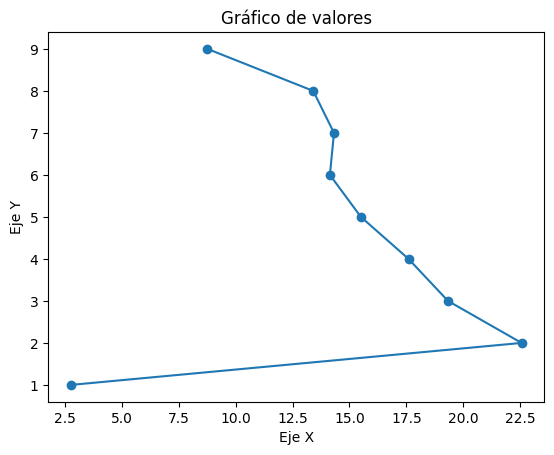

In [21]:

from scipy import stats
import matplotlib.pyplot as plt #Bibioteca para iterar


df = dfBeta.round()

aMean = []
aMedian = []
aMode = []

    # Iterar sobre cada fila 
for index, row in df.iterrows():        
    # Extraer los valores de la fila en un array
    values = row.to_numpy()        
    # Calcular estadísticas
    mean = np.mean(values)
    median = np.median(values)
    mode = stats.mode(values)
    # trend = linregress(np.arange(len(values)), values).slope

    #Redondear valores de los promedios antes de regrezar al archivo json, al valor mas cercano
    #meanRounded = [round_to_closest(number) for number in mean]
    #print("Prmedios redondeados : ",mean," Tipo de dato : ",type(mean))
    mean_rounded = np.around(mean, decimals=2)


        #Guardar valores de arreglos
    aMean.append(mean_rounded)
    aMedian.append(median)
    aMode.append(mode.mode)        

    # print("Sin iterar : ",aMean)

# for i in range(len(aMean)):
#      print("Semestre",i+1,":",aMean[i])

for i,value in enumerate(aMean):
    print("Semestre",i+1,":",value)


# Crear un arreglo de valores
x = np.array(aMean)
y = np.array(range(1,len(aMean)+1))

# Graficar los valores
plt.plot(x, y, marker='o')  # Utilice 'o' para marcar los puntos en el gráfico
plt.xlabel('Eje X')  # Etiqueta del eje X
plt.ylabel('Eje Y')  # Etiqueta del eje Y
plt.title('Gráfico de valores')  # Título del gráfico
plt.show()  # Mostrar el gráfico




### 2da Grafica

TypeError: unsupported operand type(s) for -: 'list' and 'int'

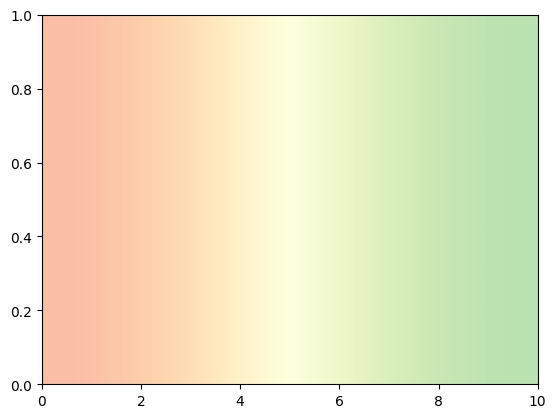

In [23]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801)


def gradient_image(ax, direction=0.3, cmap_range=(0, 1), **kwargs):
    """
    Draw a gradient image based on a colormap.

    Parameters
    ----------
    ax : Axes
        The axes to draw on.
    direction : float
        The direction of the gradient. This is a number in
        range 0 (=vertical) to 1 (=horizontal).
    cmap_range : float, float
        The fraction (cmin, cmax) of the colormap that should be
        used for the gradient, where the complete colormap is (0, 1).
    **kwargs
        Other parameters are passed on to `.Axes.imshow()`.
        In particular, *cmap*, *extent*, and *transform* may be useful.
    """
    phi = direction * np.pi / 2
    v = np.array([np.cos(phi), np.sin(phi)])
    X = np.array([[v @ [1, 0], v @ [1, 1]],
                  [v @ [0, 0], v @ [0, 1]]])
    a, b = cmap_range
    X = a + (b - a) / X.max() * X
    im = ax.imshow(X, interpolation='bicubic', clim=(0, 1),
                   aspect='auto', **kwargs)
    return im


def gradient_bar(ax, x, y, width=0.5, bottom=0):
    for left, top in zip(x, y):
        right = left + width
        gradient_image(ax, extent=(left, right, bottom, top),
                       cmap=plt.cm.Blues_r, cmap_range=(0, 0.8))


fig, ax = plt.subplots()
ax.set(xlim=(0, 10), ylim=(0, 1))

# background image
gradient_image(ax, direction=1, extent=(0, 1, 0, 1), transform=ax.transAxes,
               cmap=plt.cm.RdYlGn, cmap_range=(0.2, 0.8), alpha=0.5)

N = 10
x = np.arange(aMean) + 0.15
y = np.random.rand(range(len(aMean)+1))
gradient_bar(ax, x, y, width=0.7)
plt.show()

#No va a funcioanr porque  no se pueden pasar arreglos/listas